<a href="https://colab.research.google.com/github/766O/Baseballdata_MLproject/blob/main/KBO_%ED%83%80%EC%9E%90_%ED%99%88%EB%9F%B0%EC%98%88%EC%B8%A1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np


#**EDA & Feature Engineering**

In [39]:
X = pd.DataFrame(pd.read_csv('2016-2021_data.csv',engine='python',encoding='CP949'))
Y = pd.DataFrame(pd.read_csv('2022_data.csv',engine='python',encoding='CP949'))

X.head()
Y.head()

,Year,선수명,팀명,AVG,G,PA,AB,R,H,2B,...,XBH,GO,AO,GO/AO,GW RBI,BB/K,P/PA,ISOP,XR,GPA
0,2022,이정후,키움,0.349,142,627,553,85,193,36,...,69,154,177,0.87,15,2.06,3.69,0.226,120.2,0.333
1,2022,피렐라,삼성,0.342,141,630,561,102,192,33,...,65,149,141,1.06,12,0.68,3.45,0.223,114.4,0.326
2,2022,박건우,NC,0.336,111,463,408,52,137,18,...,29,100,112,0.89,7,0.71,3.87,0.123,72.1,0.298
3,2022,이대호,롯데,0.331,142,591,540,53,179,23,...,46,150,161,0.93,9,0.77,3.58,0.170,90.5,0.296
4,2022,나성범,KIA,0.320,144,649,563,92,180,39,...,62,117,134,0.87,9,0.47,3.75,0.188,110.9,0.308


In [40]:
#홈런개수 분석시 불필요한 데이터 제외 

X=X.drop(['선수명','팀명','Year'],axis=1)
X.head()


,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,XBH,GO,AO,GO/AO,GW RBI,BB/K,P/PA,ISOP,XR,GPA
0,0.376,138,618,519,99,195,46,2,31,338,...,79,108,140,0.77,9,1.00,3.94,0.276,136.4,0.372
1,0.365,144,652,529,94,193,39,0,23,301,...,62,113,132,0.86,11,1.11,4.25,0.204,132.9,0.356
2,0.352,113,530,452,98,159,20,4,3,196,...,27,139,126,1.10,1,2.17,4.13,0.082,84.3,0.306
3,0.346,130,555,511,97,177,37,3,23,289,...,63,137,135,1.01,12,0.44,3.56,0.219,98.6,0.315
4,0.346,138,578,509,84,176,24,0,11,233,...,35,145,124,1.17,10,0.82,3.89,0.112,90.7,0.300


In [41]:
#예측때 사용위한 선수명 데이터 프레임
player_id=Y['선수명']

In [42]:
#홈런개수 와 상관계수가 0.4이상인 컬럼들 확인
corr=X.corr()
corr_columns=corr.index[abs(corr['HR'])>=0.4]
corr_columns

Index(['HR', 'TB', 'RBI', 'SAC', 'XBH', 'GO', 'GO/AO', 'GW RBI', 'ISOP', 'XR',
       'GPA'],
      dtype='object')

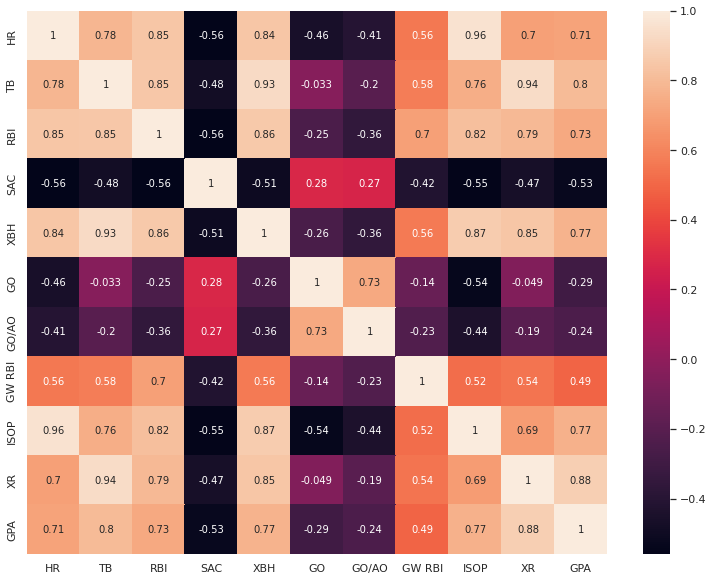

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,10))
heatmap=sns.heatmap(X[corr_columns].corr(),annot=True)

In [44]:


#칼럼 하나씩 살펴보고 이상치 제거 / 제외할 칼럼 선정 (Outlier remove)

#pitchers=X[['AVG','G','R','2B','HR','RBI','SAC','SF','XBH','GO/AO','GW RBI','BB/K','P/PA','ISOP']]
pitchers=X[['AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SAC',
       'SF', 'XBH', 'GO', 'AO', 'GO/AO', 'GW RBI', 'BB/K', 'P/PA', 'ISOP',
       'XR', 'GPA']]
def plot_scatter_each_columns(df):
  plt.rcParams['figure.figsize']=[20,16]
  fig=plt.figure()
  for i in range(len(df.columns)):
    ax=fig.add_subplot(5,5,i+1)
   # print(df.columns[i])
    #print(df[df.columns[i]])
    plt.scatter(df[df.columns[i]],df['HR'])
    #plt.xlabel(df.columns[i])
    plt.ylabel('HR')
    ax.set_title(df.columns[i])
  plt.show()


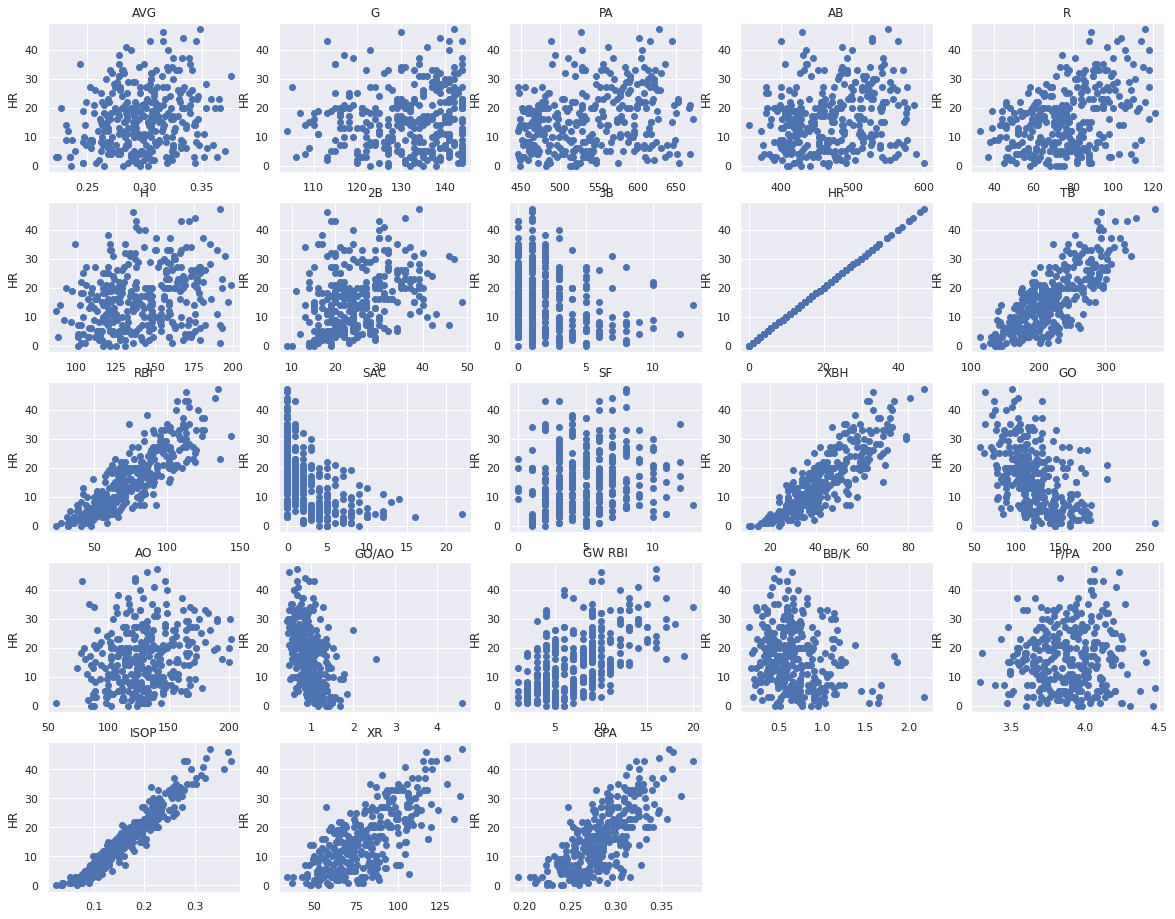

In [45]:
plot_scatter_each_columns(pitchers)

In [46]:
#강한상관관계 가지는 컬럼들 => TB ,RBI, XBH, ISOP, GPA, XR 

In [47]:
# 상관계수가 높은 변수들을 사용하면 다중공산성이 높아 문제를 일으킬 가능성이 높다
#VIF 확인 -> 다른독립변수에 의존하는 변수 삭제
#VIF 수치 높은 컬럼들 삭제해가면서 VIF가 변하는 모습 살펴보기
#충분히 수치가 낮아지면 해당 컬럼 사용

In [48]:
#AB 타수 PA 타석  TB 루타  RBI 타점 SF 희플  GO/AO 땅볼/플라이 비율 GO 땅볼 AO 플라이 GW RBI 결승타 P/PA투구수/타석수 
#XR 득점기여도 SAC 희생타 BB/K 볼삼비 GPA 출루율가중 ops XBH 장타개수
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_X=X
vif_X=X.drop(['AVG','G','PA','AB','H','3B','SAC','SF','AO','GO','BB/K','P/PA'],axis=1)

vif=pd.DataFrame()
vif['VIF Factor']=[float(variance_inflation_factor(vif_X.values,i))for i in range(vif_X.shape[1])]
vif['features']=vif_X.columns
vif.sort_values('VIF Factor')
vif

,VIF Factor,features
0,74.543291,R
1,316.563817,2B
2,123.560482,HR
3,893.800668,TB
4,83.711944,RBI
5,1905.717694,XBH
6,12.878310,GO/AO
7,9.840790,GW RBI
8,607.766830,ISOP
9,202.106561,XR


In [49]:
#분석 컬럼 결정
X=X.drop(['AVG','G','PA','AB','H','3B','SAC','SF','AO','GO','BB/K','P/PA'],axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


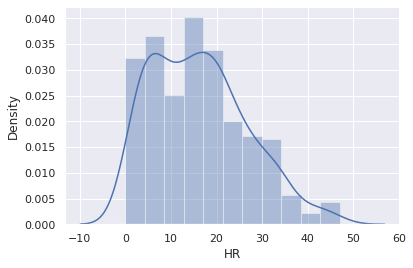

In [50]:
#타겟 데이터 확인

sns.set()
%matplotlib inline

sns.distplot(X['HR'])

0    3.465736
1    3.178054
2    1.386294
3    3.178054
4    2.484907
Name: HR, dtype: float64
    R  2B   TB  RBI  XBH  GO/AO  GW RBI   ISOP     XR    GPA
0  99  46  338  144   79   0.77       9  0.276  136.4  0.372
1  94  39  301  136   62   0.86      11  0.204  132.9  0.356
2  98  20  196   41   27   1.10       1  0.082   84.3  0.306
3  97  37  289  101   63   1.01      12  0.219   98.6  0.315
4  84  24  233   90   35   1.17      10  0.112   90.7  0.300


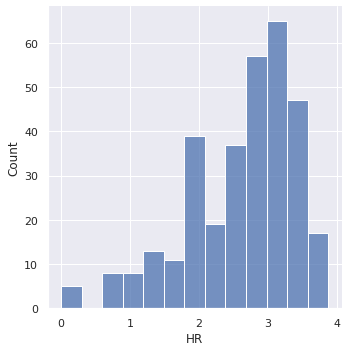

In [51]:
#로그 스케일링 진행
#정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함/데이터 간 편차를 줄여 왜도1(skewness)와 첨도2(Kurtosis)를 줄일 수 있기 때문에 정규성이 높아진다. 

#훈련시 타겟데이터는 X_result 에 따로 저장후 
X_result=np.log1p(X['HR'])
sns.displot(X_result)
#X에서 HR데이터 삭제
X=X.drop(['HR'],axis=1)

print(X_result.head())
print(X.head())

In [52]:
print(X.columns,X.shape)
print(Y.columns,Y.shape)

Index(['R', '2B', 'TB', 'RBI', 'XBH', 'GO/AO', 'GW RBI', 'ISOP', 'XR', 'GPA'], dtype='object') (326, 10)
Index(['  Year', '선수명', '팀명', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'TB', 'RBI', 'SAC', 'SF', 'XBH', 'GO', 'AO', 'GO/AO', 'GW RBI',
       'BB/K', 'P/PA', 'ISOP', 'XR', 'GPA'],
      dtype='object') (53, 26)


In [53]:
#테스트 데이터도 똑같이 없애줘야함 
Y_result=np.log1p(Y['HR'])
Y=Y.drop(['  Year','HR','선수명', '팀명', 'AVG', 'G', 'PA', 'AB','3B',
       'HR','SAC', 'SF','GO', 'AO','BB/K', 'P/PA'],axis=1)



In [54]:
Y=Y.drop(['H'],axis=1)
print(X.columns,X.shape)
print(Y.columns,Y.shape)

Index(['R', '2B', 'TB', 'RBI', 'XBH', 'GO/AO', 'GW RBI', 'ISOP', 'XR', 'GPA'], dtype='object') (326, 10)
Index(['R', '2B', 'TB', 'RBI', 'XBH', 'GO/AO', 'GW RBI', 'ISOP', 'XR', 'GPA'], dtype='object') (53, 10)


In [55]:
#학습용 데이터 =>과거데이터와 예측할해의 데이터 합침
df=pd.concat((X,Y))

df.head()

,R,2B,TB,RBI,XBH,GO/AO,GW RBI,ISOP,XR,GPA
0,99,46,338,144,79,0.77,9,0.276,136.4,0.372
1,94,39,301,136,62,0.86,11,0.204,132.9,0.356
2,98,20,196,41,27,1.10,1,0.082,84.3,0.306
3,97,37,289,101,63,1.01,12,0.219,98.6,0.315
4,84,24,233,90,35,1.17,10,0.112,90.7,0.300


In [56]:
print(df.shape) 
#과거 데이터들의 홈런개수
print(X_result.shape)
#예측 해야할 정답 2022홈런개수
print(Y_result.shape)

(379, 10)
(326,)
(53,)


In [57]:
from scipy.stats import skew

skewness = df.apply(lambda x:skew(x.dropna())).sort_values(ascending=False)

In [58]:
high_skewness=skewness[abs(skewness)>1]
skew_feats=high_skewness.index
print(high_skewness)
print(skew_feats)

GO/AO    3.284661
dtype: float64
Index(['GO/AO'], dtype='object')


In [59]:
df=df.drop(['GO/AO'],axis=1)
print(df.head())

    R  2B   TB  RBI  XBH  GW RBI   ISOP     XR    GPA
0  99  46  338  144   79       9  0.276  136.4  0.372
1  94  39  301  136   62      11  0.204  132.9  0.356
2  98  20  196   41   27       1  0.082   84.3  0.306
3  97  37  289  101   63      12  0.219   98.6  0.315
4  84  24  233   90   35      10  0.112   90.7  0.300


In [60]:
X=X.drop(['GO/AO'],axis=1)
Y=Y.drop(['GO/AO'],axis=1)
print(Y.head())
print(Y.shape)

     R  2B   TB  RBI  XBH  GW RBI   ISOP     XR    GPA
0   85  36  318  113   69      15  0.226  120.2  0.333
1  102  33  317  109   65      12  0.223  114.4  0.326
2   52  18  187   61   29       7  0.123   72.1  0.298
3   53  23  271  101   46       9  0.170   90.5  0.296
4   92  39  286   97   62       9  0.188  110.9  0.308
(53, 9)


In [64]:
X_train=X
X_test=Y

X_train.shape
X_test.shape

(53, 9)

#**Modeling&Prediction**

In [91]:
#사용 모델
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [92]:
#학습전 데이터 스케일링 진행
#중앙값과 IQR 사용하여 아웃라이어의 영향 최소화
from sklearn.preprocessing import RobustScaler


rs=RobustScaler()
rs_Xtrain=rs.fit_transform(X_train) #학습X데이터
rs_Xtest=rs.transform(X_test) #학습 검증 X데이터



In [93]:
#KFold test

kfold=KFold(n_splits=5)

random_state=42
reg=[]

reg.append(Lasso(random_state=random_state))
reg.append(ElasticNet(random_state=random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state=random_state))

reg_results=[]

for regre in reg:
  reg_results.append(np.mean(np.sqrt(-cross_val_score(regre,rs_Xtrain,y=X_result,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1))))

In [94]:
reg_means=[]
reg_std=[]

for reg_result in reg_results:
  reg_means.append(reg_result.mean())
  reg_std.append(reg_result.std())

In [95]:
#Lasso, ElasticNet, RandomForest, GradientBoosting, XGBoost, LGBM에 대한 교차검증결과
# 평균이 낮을수록 좋음
reg_re=pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.802726,0.0
1,0.802726,0.0
2,0.211254,0.0
3,0.206055,0.0
4,0.209700,0.0
5,0.215040,0.0


In [70]:
# 모델은  RandomForest, GradientBoosting, XGBoost, LGBM 모델사용

In [96]:
GBC=GradientBoostingRegressor()


params={
    'n_estimators':[30,50,100],
    'learning_rate':[0.1,0.01,0.2],
    'max_depth':[3,4,5],
    'min_samples_leaf':[1,5,10],
    'max_features':[0.3,0.2,0.15]
}

grid_GBC=GridSearchCV(GBC,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
#GBC.get_params().keys()
#하이퍼 파라미터 튜닝하는 값을 잘못 넣은줄 알았는데 올바르지않은 파라미터 이름(오타)였음 
grid_GBC.fit(X_train,X_result)

print(grid_GBC.best_estimator_)
print(grid_GBC.best_score_)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
GradientBoostingRegressor(max_depth=4, max_features=0.3, min_samples_leaf=5)
-0.04850807106083093


In [97]:
RF=RandomForestRegressor()

params={
    'n_estimators':[30,50,100],
    'min_samples_leaf':[1,5,10],
    'max_features':[0.3,0.2,0.15],
    'max_depth':[3,4,5]
    
}

grid_RF=GridSearchCV(RF,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
grid_RF.fit(X_train,X_result)


print(grid_RF.best_params_)
print(grid_RF.best_estimator_)
print(grid_RF.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 1, 'n_estimators': 50}
RandomForestRegressor(max_depth=5, max_features=0.3, n_estimators=50)
-0.07369977107589865


In [98]:
XGB=XGBRegressor()

params={
     'n_estimators':[30,50,100],
     'max_depth':[3,4,5],
     'learning_rate':[0.1,0.01,0.2], #학습 단계별로 이전 결과를 얼마나 반영할지 설정한다. 일반적으로는 0.01 ~ 0.2 사이의 값
     'subsample': [0.6, 0.7, 1.0],# 각 트리마다 데이터 샘플링 비율 over-fitting방지 일반적으로 0.5 ~ 1을 사용
     'colsample_bytree' : [0.3,0.5,0.7],#각 트리마다 feature 샘플링 비율 일반적으로 0.5 ~ 1을 사용한다.
     'scale_pos_weight' : [0.5,1], #데이터가 불균형 할때 사용 보통은 음성 데이터 수 / 양성 데이터 수 값으로 한다.
     'reg_alpha': [0,0.05,0.0005] #규제(Lasso)

}

grid_XGB=GridSearchCV(XGB,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
grid_XGB.fit(X_train,X_result)

print(grid_XGB.best_params_)
print(grid_XGB.best_estimator_)
print(grid_XGB.best_score_)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
[15:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.05, 'scale_pos_weight': 0.5, 'subsample': 0.7}
XGBRegressor(colsample_bytree=0.7, reg_alpha=0.05, scale_pos_weight=0.5,
             subsample=0.7)
-0.04194868399584


In [99]:
LGBM=LGBMRegressor()

params={
    'n_estimators':[30,50,100],
     'max_depth':[3,4,5,10,15],
     'learning_rate':[0.1,0.01,0.2],
     'num_leaves': [10, 30, 50],
     'min_split_gain': [0.1, 0.2, 0.3],

}

grid_LGBM=GridSearchCV(LGBM,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
grid_LGBM.fit(X_train,X_result)

print(grid_LGBM.best_params_)
print(grid_LGBM.best_estimator_)
print(grid_LGBM.best_score_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
{'learning_rate': 0.2, 'max_depth': 4, 'min_split_gain': 0.1, 'n_estimators': 30, 'num_leaves': 10}
LGBMRegressor(learning_rate=0.2, max_depth=4, min_split_gain=0.1,
              n_estimators=30, num_leaves=10)
-0.05131073256293559
